## BUSINESS PROBLEM

In recent years, City Hotel and Resort Hotel have seen high cancellation rates. Each hotel is now dealing with a number of issues as a resutl, including fewer revenues and less than ideal hotel room use. Consequently, lowering cancellation rates is both hotels' primary goal in order to increase their efficiency in generating revenue, and for us to offer thorough business advice to address this problem.

The analysis of hotel booking cancellations as well as other factors that have no bearing on their business and yearly revenue generation are the main topics of this resort.

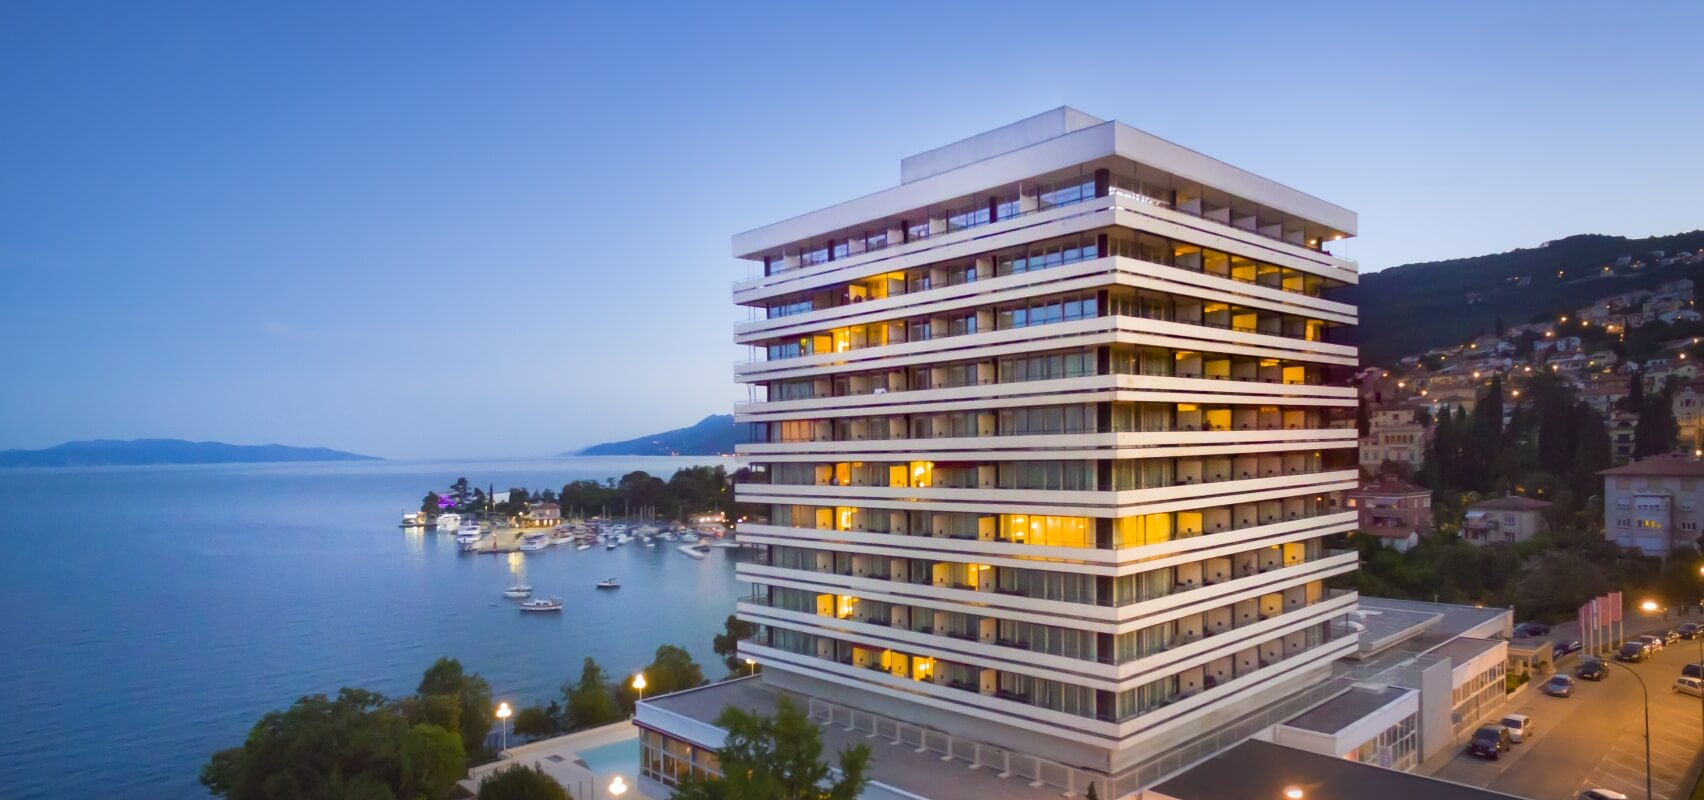

We will perform Exploratory Data Analysis and answer these questions
* Where do the guests come from?
* How much do guests pay for a room per night?
* How does the price per night vary over the year?
* Which are the busiest month?
* How long do people stay at the hotels?
* Bookings by market segment
* How many bookings were canceled?
* Which month has the highest number of cancelations?
* Repeated guest effect on cancellations.
* The number of nights spent at hotels.
* Hotel type with more time spent.
* Effects of deposit on cancellations by segments.
* Relationship of lead time with cancellation.
* Monthly customers and cancellations.

### Importing Libraries    

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [124]:
df = pd.read_csv(r"D:\Projects\Hotel Booking\hotel_booking.csv")

In [125]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
23910,Resort Hotel,0,3,2016,May,19,6,0,1,2,...,Transient,79.00,1,1,Check-Out,2016-05-07,John Crawford,Crawford_John@aol.com,838-938-9852,************3304
9697,Resort Hotel,1,126,2016,December,53,26,2,5,1,...,Transient-Party,51.22,0,0,Canceled,2016-09-17,Adam Martinez,Adam_Martinez@aol.com,654-316-0469,************9981
16668,Resort Hotel,0,297,2015,September,36,3,1,3,2,...,Transient-Party,123.00,0,2,Check-Out,2015-09-07,Daniel Garrett,Garrett_Daniel@verizon.com,222-807-7769,************7633
57141,City Hotel,1,280,2016,September,39,19,1,2,1,...,Transient,100.00,0,0,Canceled,2016-01-18,Alicia Solis,ASolis@protonmail.com,136-256-5968,************8610
80750,City Hotel,1,176,2016,April,15,9,1,1,2,...,Transient,125.00,0,0,Canceled,2015-11-23,Michael Martin,Martin.Michael@aol.com,547-302-4568,************2207


## Data Preparation and Cleaning

In [126]:
df.shape

(119390, 36)

### Droping Features that are not required for analysis

In [127]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [128]:
df.drop(columns={'name', 'email',
       'phone-number', 'credit_card'}, inplace=True)

In [129]:
df.shape

(119390, 32)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

We can see that reservation_status_date is object and we need to convert in to datetime

In [131]:
# convert to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [133]:
# unique values in categorical columns
df.describe(include=object)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [134]:
for col in df.describe(include=object).columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [135]:
# Checking for null values
x=df.isnull().mean()
x[x>0]*100

children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64

In [136]:
df.shape[0]

119390

In [137]:
# Drop missing values
df.drop(['company','agent'], axis=1, inplace=True)
df.dropna(inplace=True)

In [138]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [139]:
filter=(df['children']==0) & (df['adults']==0) & (df['babies']==0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


* Adults, babies, and children can’t be zero at the same time, so dropping the rows having all these zero at the same time because will mean that the hotel/room was not even booked.

In [140]:
df[~filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [141]:
# making a copy of orginal data
og_df = df.copy()

### Exploratory Analysis and Visualization

### Country

In [142]:
df.country

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 118898, dtype: object

In [143]:
df.country.nunique()

177

In [144]:
top_countries = df.country.value_counts().head(10)
top_countries

PRT    48586
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

PRT — Portugal, GBR — United Kingdom, FRA — France, ESP — Spain, DEU — Germany, ITA — Italy, IRL — Ireland, BEL — Belgium, BRA — Brazil, NLD — Netherlands

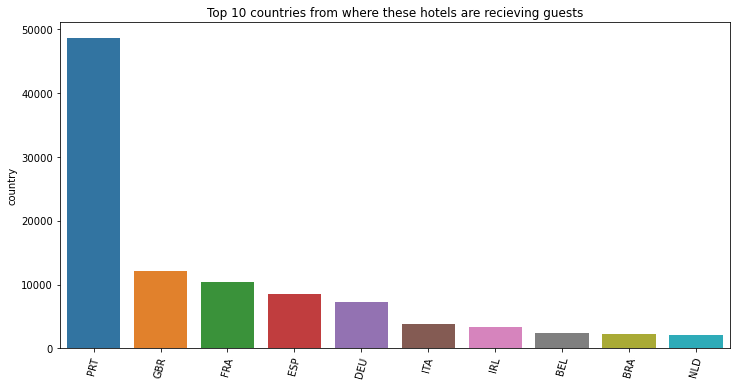

In [145]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 10 countries from where these hotels are recieving guests');
sns.barplot(x=top_countries.index, y=top_countries);

It appears that a disproportionately high number of bookings are from Portugal, probably because the hotel is located in Portugal itself. The second country is the United Kingdom which is approx. 75% behind

### Country wise guest

In [146]:
# Cancelled booking are not included here

country_wise_guests = df[df['is_canceled']==0]['country'].value_counts().head(10).reset_index()
country_wise_guests.columns = ['Country', 'No of guests']
country_wise_guests

,Country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
5,IRL,2543
6,ITA,2433
7,BEL,1868
8,NLD,1717
9,USA,1596


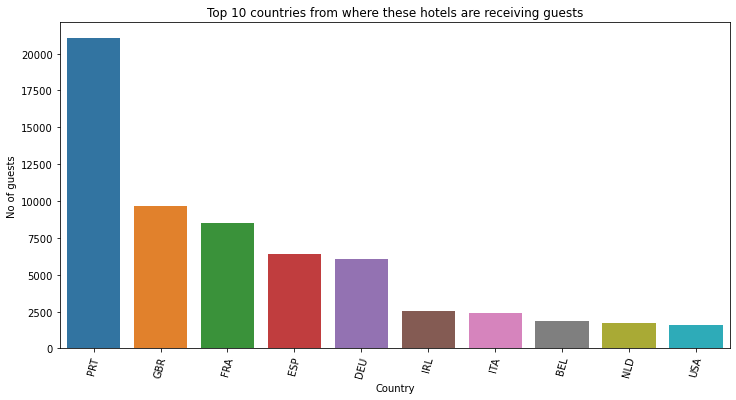

In [147]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 10 countries from where these hotels are receiving guests');
sns.barplot(x=country_wise_guests.Country, y=country_wise_guests['No of guests']);

As we can see there is a slight change in the data. Brazil is nowhere to be found in this graph and United States has taken 10th place in the number of guests not canceling their bookings.

### How much do guests pay for a room per night?

In [148]:
resort_hotel = df.loc[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
city_hotel = df.loc[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [149]:
# Counting adults and children as paying guests only, not babies.
resort_hotel['adr_pp'] = resort_hotel['adr'] / (resort_hotel['adults'] + resort_hotel['children'])

In [150]:
resort_hotel_filtered = resort_hotel.replace([np.inf, -np.inf], 0)

In [151]:
city_hotel['adr_pp'] = city_hotel['adr'] / (city_hotel['adults']+city_hotel['children'])

In [152]:
city_hotel_filtered = city_hotel.replace([np.inf, -np.inf], 0)

In [153]:
print("""From all non-cnceled bookings, across all room types and meals, the average prices are:
Resort hotel: {:.2f} € per night and person.
City hotel: {:.2f} € per night and person."""
      .format(resort_hotel_filtered["adr_pp"].mean(), city_hotel_filtered["adr_pp"].mean()))

From all non-cnceled bookings, across all room types and meals, the average prices are:
Resort hotel: 47.54 € per night and person.
City hotel: 59.23 € per night and person.


In [154]:
# normalize price per night (adr)
df['adr_pp'] = df['adr'] / (df['adults'] + df['children'])
df_guests = df.loc[df['is_canceled'] == 0]
df_guests

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,49.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,48.070000
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,75.143333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,78.855000
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,52.200000


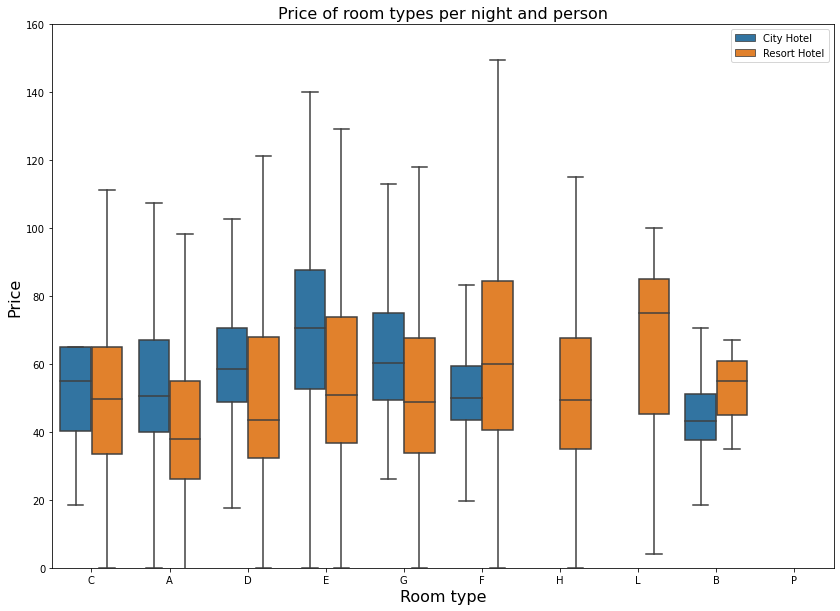

In [155]:
# boxplot
plt.figure(figsize=(14,10))
sns.boxplot(x='reserved_room_type', y='adr_pp', hue='hotel', data=df,
           hue_order = ['City Hotel', 'Resort Hotel'], fliersize=0)
plt.title('Price of room types per night and person', fontsize=16)
plt.xlabel('Room type', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend(loc='upper right')
plt.ylim(0,160)
plt.show()

This figure shows the average price per room, depending on its type and the standard deviation

### How does the price per night vary over the year?

In [156]:
room_prices_monthly = df_guests[['hotel', 'arrival_date_month', 'adr_pp']].sort_values('arrival_date_month')
room_prices_monthly

,hotel,arrival_date_month,adr_pp
49256,City Hotel,April,43.775
110748,City Hotel,April,65.250
110749,City Hotel,April,50.400
110750,City Hotel,April,65.250
110751,City Hotel,April,109.800
...,...,...,...
97781,City Hotel,September,80.000
97782,City Hotel,September,169.000
97783,City Hotel,September,119.000
97773,City Hotel,September,47.500


In [157]:
# order by month
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August",
                  "September", "October", "November", "December"]
room_prices_monthly["arrival_date_month"] = pd.Categorical(room_prices_monthly["arrival_date_month"], categories=ordered_months, ordered=True)

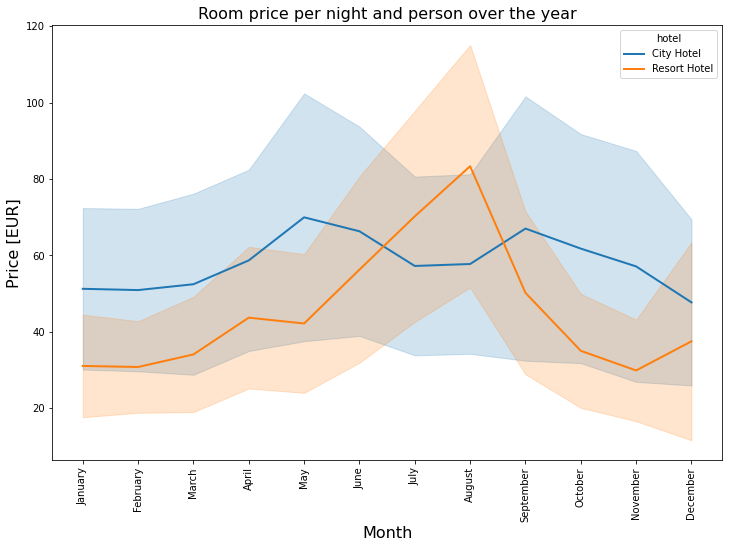

In [158]:
# barplot with standard deviation:

plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_monthly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2, 2))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=90)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

This clearly shows that the prices in the Resort hotel are much higher during the month of August. There is summer season there in portugal at that time. The price of the city hotel varies less and is most expensive during may and september where there is spring and autumn season respectively.

### How many guests are there who have repeatedly canceled the bookings?

In [159]:
df['is_repeated_guest'] = df['is_repeated_guest'].replace(0,'No')
df['is_repeated_guest'] = df['is_repeated_guest'].replace(1,'Yes')

In [160]:
df['is_repeated_guest']

0         No
1         No
2         No
3         No
4         No
          ..
119385    No
119386    No
119387    No
119388    No
119389    No
Name: is_repeated_guest, Length: 118898, dtype: object

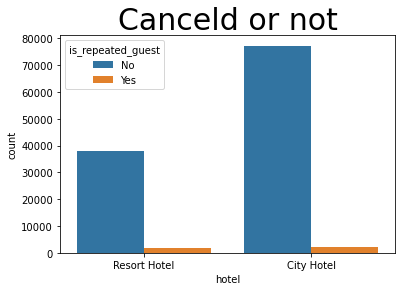

In [161]:
plt.title('Canceld or not', fontdict={'fontsize':30})
canceled = sns.countplot(x=df.hotel, hue = 'is_repeated_guest', data=df)

### Let’s check in which hotel people like to stay and spend more time.

Let’s plot the boxplot market segment wise and we will first check for the week nights stay. The market segment will tell us what type of stay is it.

<AxesSubplot:xlabel='market_segment', ylabel='stays_in_week_nights'>

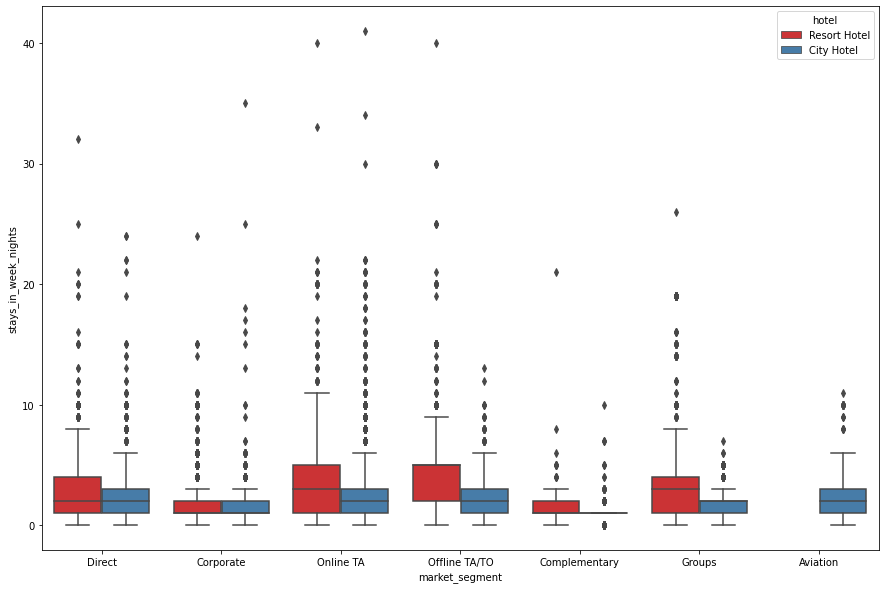

In [162]:
plt.figure(figsize=(15,10))
sns.boxplot(x='market_segment', y='stays_in_week_nights', data = df, hue='hotel', palette='Set1')

Now let’s plot the boxplot market segment wise and we will now check for the weekends stay.

<AxesSubplot:xlabel='market_segment', ylabel='stays_in_weekend_nights'>

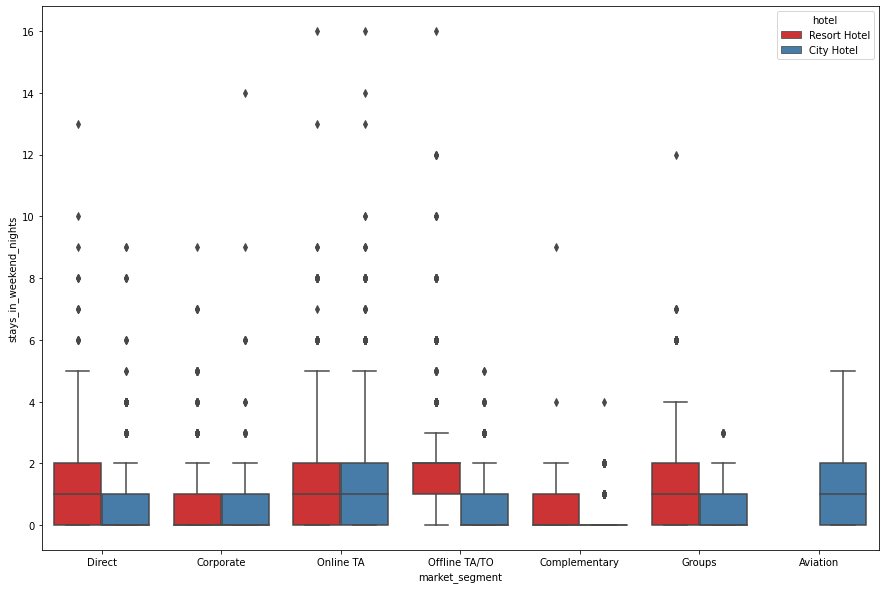

In [163]:
plt.figure(figsize=(15,10))
sns.boxplot(x='market_segment', y='stays_in_weekend_nights', data=df, hue='hotel', palette='Set1')

* It can be seen that most of the groups are normally distributed, some of them have high skewness. 
* Looking at the distribution, it can be concluded that most people do not seem to prefer to stay at the hotel for more than 1 week. But it seems normal to stay in resort hotels for up to 12–13 days. 
* Although this changes according to the segments, staying longer than 15 days certainly creates outliers for each segment. If the total time feature was created by summing up the weekend and week nights, this would be clearer, but it can be clearly seen when looking at the two visualizations together.

* As it turns out, customers from Aviation Segment do not seem to be staying at the resort hotels and have a relatively lower day average. 
* Apart from that, the weekends and weekdays averages are roughly equal. Customers in the Aviation Segment are likely to arrive shortly due to business. 
* Also probably most airports are a bit away from sea and its most likely to be closer to city hotels.

* It is obvious that when people go to resort hotels, they prefer to stay more.

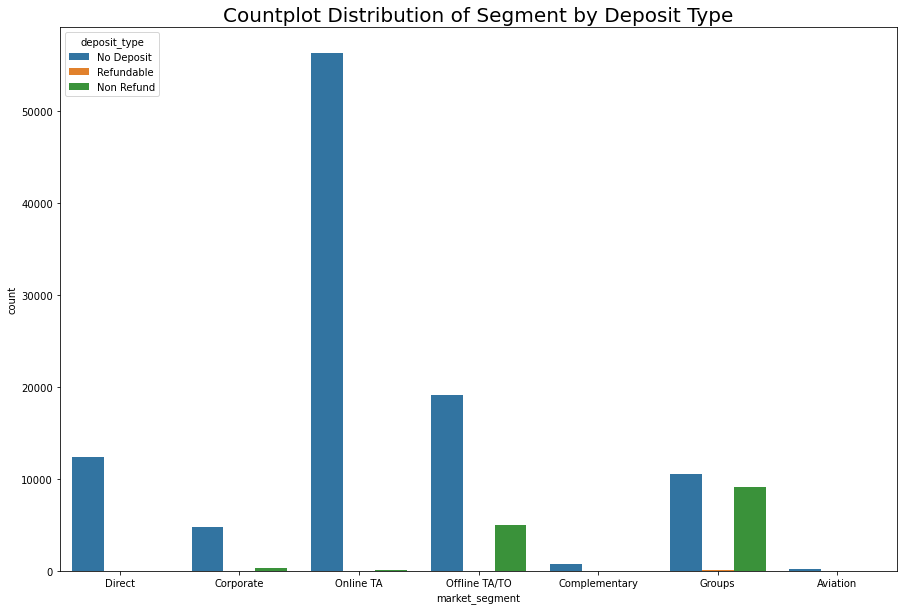

In [164]:
# countplot by market segment distribution.

plt.figure(figsize=(15,10))
plt.title('Countplot Distribution of Segment by Deposit Type', fontdict = {'fontsize':20})
ax=sns.countplot(x='market_segment', hue='deposit_type', data=df)

### What is the effects of deposit on cancellations by segments.

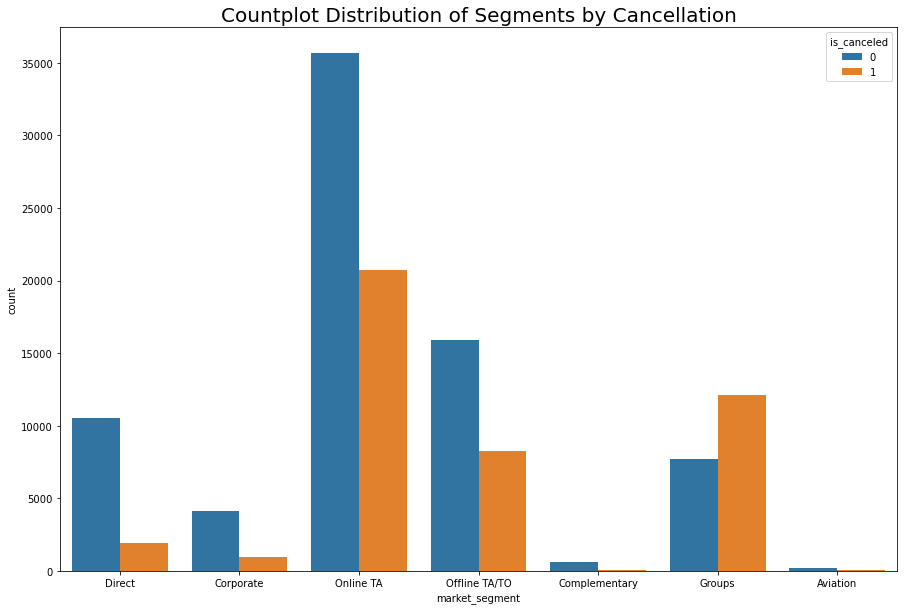

In [165]:
plt.figure(figsize=(15,10))
plt.title("Countplot Distribution of Segments by Cancellation", fontdict={'fontsize':20})
ax = sns.countplot(x='market_segment', hue='is_canceled', data=df)

* The cancellation rate for groups is greater than 50%.
* The cancellation rate for offline TA/TOs (Travel Agents/Tour Operators) and online TAs is greater than 33%.
* Direct segments have a lower rate of cancellation.

### What is the relationship of lead time with cancellation.

In [166]:
# density curve of lead time by cancellation

df['is_canceled'] = df['is_canceled'].replace(0,'No')
df['is_canceled'] = df['is_canceled'].replace(1,'Yes')

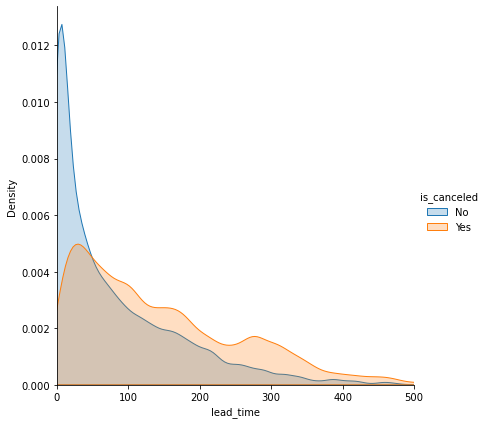

In [167]:
sns.FacetGrid(df, hue='is_canceled', height=6, xlim=(0,500)).map(sns.kdeplot, 'lead_time', shade=True).add_legend()

* When the lead time exceeds about 60, guests frequently cancel their bookings (cancellation rate is higher after this point). 
* Additionally, people want their vacation or work schedules to be calculated across 100 days, or 50% of the data

### What is the monthly customers each hotel is receiving?

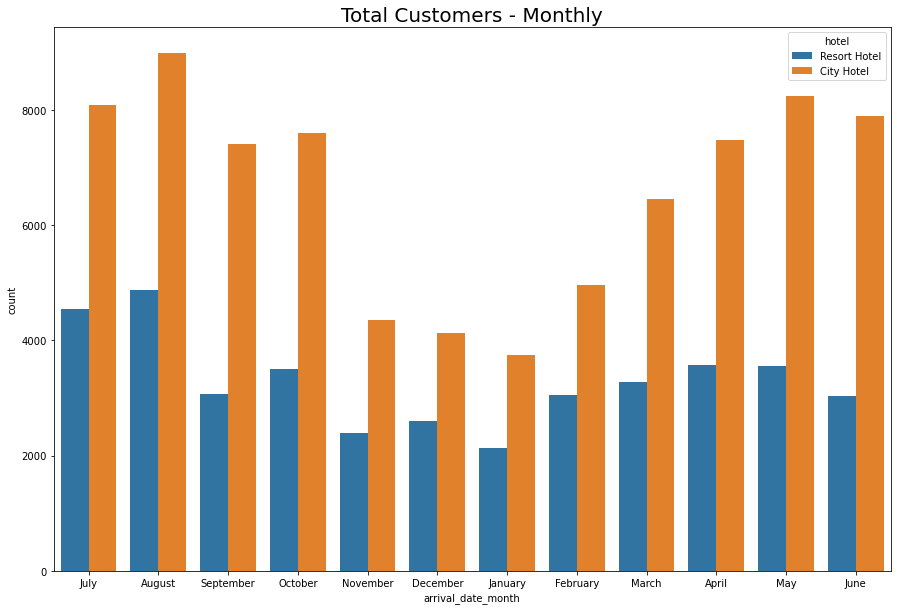

In [168]:
plt.figure(figsize=(15,10))
plt.title('Total Customers - Monthly', fontdict={'fontsize':20})
ax = sns.countplot(x='arrival_date_month', hue='hotel', data=df)

* The first graph shows that city hotels receive more guests throughout the year. 
* Resort hotels appear to be slightly closer to city hotels in the summer when comparing proportions

### Which are the most busy month?

In [169]:
# Create a DataFrame with the relevant data

resort_guests_monthly = resort_hotel.groupby('arrival_date_month')['hotel'].count()
city_guests_monthly = city_hotel.groupby('arrival_date_month')['hotel'].count()

resort_guest_data = pd.DataFrame({'month' : list(resort_guests_monthly.index),
                                 'hotel' : 'Resort hotel',
                                 'guests' : list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({'month' : list(city_guests_monthly.index),
                               'hotel' : 'City hotel',
                               'guests' : list(city_guests_monthly.values)})

full_guest_data = pd.concat([resort_guest_data, city_guest_data], ignore_index = True)

In [170]:
# order by month

ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

In [171]:
# Dataset contains July and August date from 3 years, the other month from 2 years. Normalize data

full_guest_data.loc[(full_guest_data['month'] == 'July') | (full_guest_data['month'] == 'August'), 'guests']/=3
full_guest_data.loc[~((full_guest_data['month'] == 'July') | (full_guest_data['month'] == 'August')), 'guests']/=2

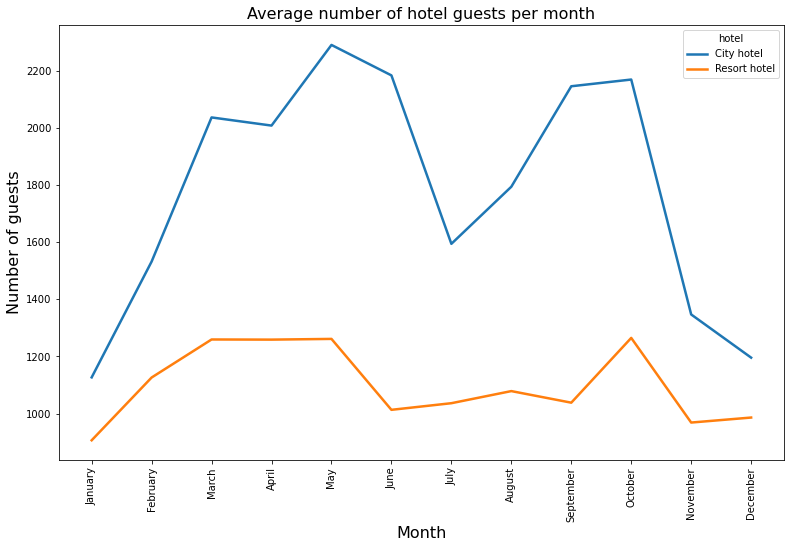

In [172]:
plt.figure(figsize=(13,8))
sns.lineplot(x='month', y='guests', hue='hotel', data=full_guest_data,
            hue_order = ['City hotel', 'Resort hotel'], size='hotel', sizes=(2.5,2.5))
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

* The City Hotel sees an increase in visitors in the spring and fall when rates are also the greatest. Less people arrive in July and August, when the prices are still lower.

* From June through September, when costs are at their greatest, fewer guests stay at the Resort hotel. The winter season draws the fewest visitors to both hotels.

### How many bookings were canceled?

In [173]:
# absolute cancelations

total_cancelations = og_df['is_canceled'].sum()
resort_cancelations = og_df.loc[og_df['hotel'] == 'Resort Hotel']['is_canceled'].sum()
city_cancelations = og_df.loc[og_df['hotel'] == 'City Hotel']['is_canceled'].sum()

In [179]:
# as percent

rel_cancel = total_cancelations / df.shape[0] * 100
rh_rel_cancel = resort_cancelations / df.loc[df['hotel'] == 'Resort Hotel'].shape[0] * 100
ch_rel_cancel = city_cancelations / df.loc[df['hotel'] == 'City Hotel'].shape[0] * 100

In [180]:
print(f"Total bookings canceled: {total_cancelations:,} ({rel_cancel:.0f} %)")
print(f"Resort hotel bookings canceled: {resort_cancelations:,} ({rh_rel_cancel:.0f} %)")
print(f"City hotel bookings canceled: {city_cancelations:,} ({ch_rel_cancel:.0f} %)")

Total bookings canceled: 44,153 (37 %)
Resort hotel bookings canceled: 11,077 (28 %)
City hotel bookings canceled: 33,076 (42 %)


## Inferences and Conclusion

* It appears that a disproportionately high number of bookings are from Portugal, probably because the hotel is located in Portugal itself. The second country is the United Kingdom which is approx. 75% behind.
* From all non-canceled bookings, across all room types and meals, the average prices are: — Resort hotel: 47.56 € per night and person. — City hotel: 59.29 € per night and person.
* The prices in the Resort hotel are much higher during the month of August. There is summer season there in portugal at that time. The price of the city hotel varies less and is most expensive during may and september where there is spring and autumn season respectively.
* Repeated guests do not cancel their reservations. Of course there are some exceptions. Also most of the customers are not repeated guests.
* Most people do not seem to prefer to stay at the hotel for more than 1 week. But it seems normal to stay in resort hotels for up to 12–13 days. Although this changes according to the segments, staying longer than 15 days certainly creates outliers for each segment.
* Customers from Aviation Segment do not seem to be staying at the resort hotels and have a relatively lower day average.
* The weekends and weekdays averages are roughly equal.
* Customers in the Aviation Segment are likely to arrive shortly due to business. Also probably most airports are a bit away from sea and its most likely to be closer to city hotels.
* The cancellation rate for groups is greater than 50%.
* The cancellation rate for offline TA/TOs (Travel Agents/Tour Operators) and online TAs is greater than 33%.
* Direct segments have a lower rate of cancellation.
* When the lead time exceeds about 60, guests frequently cancel their bookings (cancellation rate is higher after this point). Additionally, people want their vacation or work schedules to be calculated across 100 days, or 50% of the data.
* City hotels receive more guests throughout the year. Resort hotels appear to be slightly closer to city hotels in the summer when comparing proportions.
* The City Hotel sees an increase in visitors in the spring and fall when rates are also the greatest. Less people arrive in July and August, when the prices are still lower.
* From June through September, when costs are at their greatest, fewer guests stay at the Resort hotel. The winter season draws the fewest visitors to both hotels.

### Suggestions

* Since around 37% of the bookings were canceled, it's important to implement strategies to reduce cancellations. This can include lowering the rates to for specific hotels based on the locations. They can also provide discounts to the customers
* As the ratio of cancellation and not cancellation is higher in the resort hotels than in the city hotels. So the hotels should provide resonable prices during weekends or on vacations or holidays.
* As the number of cancellations are highest in January, hotels can start their marking with a resonable amount to increase their total revenue.
* Implementing marketing campaigns, tailor promotional offers or packages specifically for Portuguese guests, in order to reduce the cancellation rate.